In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
label_encoder = LabelEncoder()
file_path = r"D:\Coding_Dev\College\SEM_6\ML\Assets\breast_cancer_wisconsin_original\breast-cancer-wisconsin.data"
columns = ["Feature0","Feature1", "Feature2", "Feature3", "Feature4", "Feature5", "Feature6", "Feature7", "Feature8", "Feature9", "Class"]
df = pd.read_csv(file_path, header=None, sep=",", names=columns)
df.drop("Feature0", axis=1, inplace=True)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

In [70]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)


In [17]:
max_depth_values = list(range(1, 8))
average_errors_tree = []

In [ ]:
for max_depth in max_depth_values:
    errors = []
    for _ in range(10):  # 10 times with different splits
        # Building Decision Tree model
        dt_model = DecisionTreeClassifier(max_depth=max_depth)
        dt_model.fit(X_train, y_train)
        
        # Calculating accuracy on testing data
        accuracy = dt_model.score(X_test, y_test)
        errors.append(1 - accuracy)
    
    # Average error for this max_depth
    average_error = np.mean(errors)
    average_errors_tree.append(average_error)

plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, average_errors_tree, marker='o', linestyle='-')
plt.title('Average Error vs. Max_Depth (Decision Tree)')
plt.xlabel('Max_Depth')
plt.ylabel('Average Error')
plt.grid(True)
plt.show()

[0.08292682926829265, 0.09268292682926826, 0.04878048780487809, 0.04878048780487809, 0.06341463414634141, 0.058536585365853676, 0.06243902439024387]


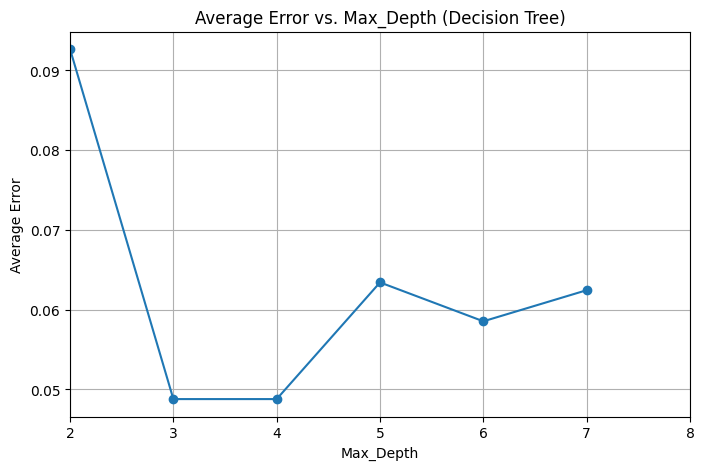

In [62]:
plt.figure(figsize=(8, 5))
average_errors_tree = []

for max_depth in max_depth_values:
    errors = []
    for _ in range(10):
        
        dt_model = DecisionTreeClassifier(max_depth=max_depth)
        dt_model.fit(X_train, y_train)
        
        
        accuracy = dt_model.score(X_test, y_test)
        errors.append(1 - accuracy)
    

    average_error = np.mean(errors)
    average_errors_tree.append(average_error)

print(average_errors_tree)
plt.plot(max_depth_values, average_errors_tree, marker='o', linestyle='-')
plt.title('Average Error vs. Max_Depth (Decision Tree)')
plt.xlabel('Max_Depth')
plt.ylabel('Average Error')
plt.grid(True)
plt.xticks(max_depth_values)
plt.xticks(range(2, 8))
plt.xlim(2, 8)
plt.show()


In [71]:
k_values = (range(3, 21, 2))
average_errors_knn = []

for k in k_values:
    errors = []
    for _ in range(10):
        # Building KNN model
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        
        
        accuracy = knn_model.score(X_test, y_test)
        errors.append(1 - accuracy)
    
    
    average_error = np.mean(errors)
    average_errors_knn.append(average_error)
print(average_errors_knn)
print(errors)

[0.034146341463414664, 0.039024390243902474, 0.034146341463414664, 0.034146341463414664, 0.034146341463414664, 0.039024390243902474, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028]
[0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028, 0.04390243902439028]


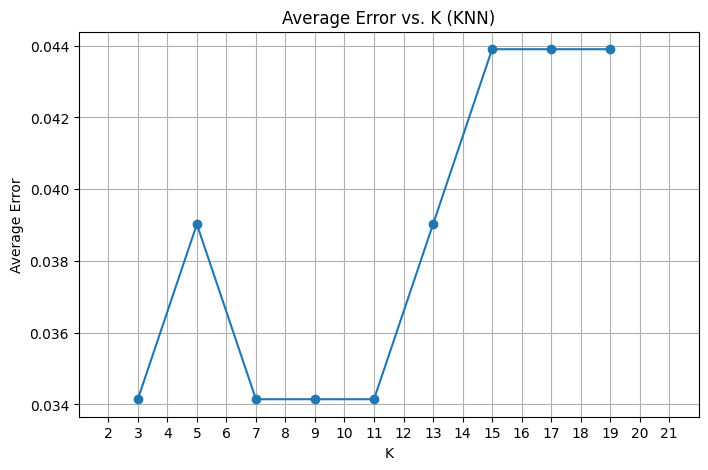

In [72]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, average_errors_knn, marker='o', linestyle='-')
plt.title('Average Error vs. K (KNN)')
plt.xlabel('K')
plt.ylabel('Average Error')
plt.grid(True)
plt.xticks(range(2, 22))
plt.xlim(1, 22)
plt.show()